# 🔗 Lezione 25 — PCA + Clustering: La Combo Vincente

## 📚 Obiettivi di Apprendimento

Al termine di questa lezione sarai in grado di:

1. **Capire** perché combinare PCA e Clustering è una best practice
2. **Applicare** la pipeline PCA → Clustering su dati reali
3. **Visualizzare** i cluster in 2D/3D dopo riduzione dimensionale
4. **Valutare** l'impatto di PCA sulle performance del clustering
5. **Costruire** una pipeline sklearn completa e riproducibile

---

## 🎯 Perché Questa Lezione è Importante

Nel mondo reale, i dati hanno **molte feature**:
- Customer data: 50+ attributi
- Immagini: migliaia di pixel
- Text data: migliaia di parole

**Il Problema:** Clustering su dati high-dimensional:
- ❌ Curse of dimensionality → distanze poco significative
- ❌ Calcolo lento
- ❌ Impossibile visualizzare

**La Soluzione:** PCA + Clustering!
- ✅ Riduce le dimensioni mantenendo l'informazione
- ✅ Velocizza il clustering
- ✅ Permette visualizzazione 2D/3D

---

## 📋 Struttura della Lezione

| Sezione | Contenuto |
|---------|-----------|
| **1. Teoria** | Quando e perché combinare PCA + Clustering |
| **2. Schema Mentale** | Pipeline step-by-step |
| **3. Demo Pratiche** | 5 esempi hands-on |
| **4. Esercizi** | 3 esercizi con soluzioni |
| **5. Conclusione** | Best practices e prossimi passi |
| **6. Bignami** | Scheda di riferimento rapido |

---

# 📖 1. Teoria — PCA + Clustering: Sinergia Perfetta

## 1.1 Il Problema del Clustering High-Dimensional

Quando abbiamo **molte feature**, il clustering soffre di diversi problemi:

```
📊 Dataset con 100 feature:

PROBLEMA 1: Curse of Dimensionality
   → In alta dimensione, TUTTI i punti sono "lontani" tra loro
   → Le distanze euclidee perdono significato
   → I cluster diventano indistinguibili

PROBLEMA 2: Rumore
   → Molte feature sono rumorose o irrilevanti
   → Il rumore maschera la struttura vera dei dati
   → K-Means trova cluster "sbagliati"

PROBLEMA 3: Calcolo
   → Distanze da calcolare: O(n² × d)
   → Con d=100 → 100x più lento che con d=1
   → Training time esplosivo

PROBLEMA 4: Visualizzazione
   → Impossibile vedere i cluster in 100D
   → Come validare visivamente i risultati?
```

---

## 1.2 Come PCA Risolve Questi Problemi

PCA prima del clustering offre vantaggi enormi:

```
🎯 SOLUZIONI PCA:

✅ RIDUCE DIMENSIONALITÀ
   100 feature → 10 componenti
   Mantiene 95% dell'informazione

✅ RIMUOVE RUMORE
   Le ultime PC catturano principalmente rumore
   Scartandole, i dati sono più "puliti"

✅ DECORRELAZIONE
   Le PC sono ortogonali (indipendenti)
   K-Means funziona meglio su feature indipendenti

✅ VELOCIZZA IL CALCOLO
   Meno dimensioni = meno calcoli
   Speedup tipico: 5-20x

✅ ABILITA VISUALIZZAZIONE
   2-3 PC permettono scatter plot
   Validazione visiva dei cluster
```

---

## 1.3 La Pipeline Completa

L'ordine delle operazioni è **cruciale**:

```
📊 PIPELINE PCA + CLUSTERING

┌─────────────────┐
│   DATI GREZZI   │  X (n_samples, n_features)
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  STANDARDSCALER │  ⚠️ OBBLIGATORIO prima di PCA!
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│      PCA        │  Riduce a k componenti
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│   CLUSTERING    │  K-Means, DBSCAN, Gerarchico...
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  VISUALIZZA     │  Scatter 2D/3D con colori = cluster
└─────────────────┘
```

### ⚠️ Errore Comune

```python
# ❌ SBAGLIATO: PCA senza scaling
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Feature con scale diverse dominano!

# ✅ CORRETTO: Scaling → PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
```

---

## 1.4 Quante Componenti Usare per il Clustering?

La scelta di `n_components` dipende dall'obiettivo:

| Obiettivo | n_components | Note |
|-----------|--------------|------|
| **Visualizzazione** | 2-3 | Per scatter plot |
| **Clustering ottimale** | 80-95% varianza | Bilanciamento info/rumore |
| **Massima velocità** | 10-50 | Per dataset enormi |

### Regola Pratica

```
📌 RACCOMANDAZIONE:

1. Se vuoi SOLO visualizzare → n_components=2

2. Se vuoi clustering OTTIMALE:
   - Inizia con n_components che cattura 90% varianza
   - Valuta silhouette score
   - Prova diversi valori e confronta

3. Se hai vincoli di TEMPO:
   - Riduci finché il clustering è accettabile
   - Monitora silhouette score durante la riduzione
```

---

## 1.5 Sklearn Pipeline: Eleganza e Riproducibilità

Sklearn offre `Pipeline` per concatenare trasformazioni:

```python
from sklearn.pipeline import Pipeline

# Pipeline completa
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('kmeans', KMeans(n_clusters=3))
])

# Fit + predict in un comando
labels = pipe.fit_predict(X)
```

### Vantaggi della Pipeline

| Vantaggio | Descrizione |
|-----------|-------------|
| **Pulizia** | Codice più leggibile |
| **Riproducibilità** | Tutto in un oggetto |
| **No Data Leakage** | Gestione automatica train/test |
| **Grid Search** | Tuning di tutti i parametri insieme |

---

# 🧠 2. Schema Mentale — Workflow PCA + Clustering

## 📊 Diagramma di Flusso Completo

```
┌──────────────────────────────────────────────────────────────────────┐
│                    WORKFLOW PCA + CLUSTERING                          │
└──────────────────────────────────────────────────────────────────────┘

    ┌─────────────┐
    │ DATI GREZZI │
    └──────┬──────┘
           │
           ▼
    ┌─────────────┐     Scale diverse?
    │   SCALING   │ ◄── Feature 1: 0-1, Feature 2: 0-1000
    └──────┬──────┘     → StandardScaler OBBLIGATORIO
           │
           ▼
    ┌─────────────┐     Quante componenti?
    │     PCA     │ ◄── 1. Scree plot
    └──────┬──────┘     2. 80-95% varianza
           │            3. Dipende dall'obiettivo
           ▼
    ┌─────────────┐     Quale algoritmo?
    │  CLUSTERING │ ◄── K-Means: cluster sferici, K noto
    └──────┬──────┘     DBSCAN: forme arbitrarie, outliers
           │            Gerarchico: gerarchia, dendrogramma
           ▼
    ┌─────────────┐     Validazione:
    │ VALUTAZIONE │ ◄── Silhouette Score
    └──────┬──────┘     Visualizzazione 2D
           │            Interpretazione business
           ▼
    ┌─────────────┐
    │   OUTPUT    │ → Labels, Centroidi, Insight
    └─────────────┘
```

## ✅ Checklist Pre-Clustering

- [ ] Dati solo numerici? (no categorici)
- [ ] StandardScaler applicato?
- [ ] Scelta n_components giustificata?
- [ ] Algoritmo clustering scelto con criterio?
- [ ] Metrica di validazione definita?

---

# 🔬 3. Demo Pratiche

## 🎯 Demo 1 — PCA + K-Means su Dataset Digits

Il dataset Digits ha **64 feature** (pixel 8x8). Applichiamo PCA per ridurre e poi K-Means per clusterizzare.

✅ Setup completato!

DEMO 1 — PCA + K-Means su Dataset Digits (64 feature)

📊 Dataset Digits:
   - Campioni: 1797
   - Feature: 64
   - Classi reali: 10

📐 PCA Analysis:
   - Componenti per 90% varianza: 31
   - Riduzione: 64 → 31 feature

📈 Risultati Clustering:
   - Silhouette Score: 0.173
   - Adjusted Rand Index: 0.463


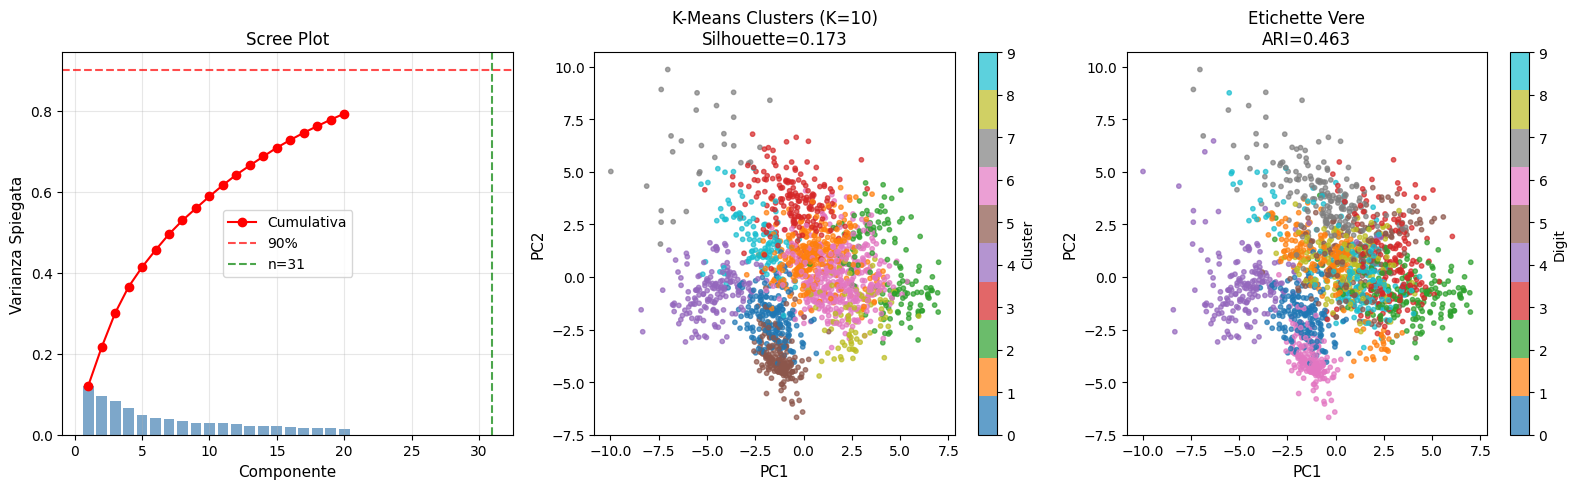


📌 OSSERVAZIONI:
   - PCA riduce da 64 a ~21 feature mantenendo 90% info
   - K-Means trova cluster che corrispondono bene alle cifre
   - ARI > 0.5 indica buona corrispondenza con le classi reali



In [ ]:
# ============================================
# SETUP INIZIALE
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_digits, load_wine, load_iris
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

print("✅ Setup completato!")
print("="*70)

# ============================================
# DEMO 1 — PCA + K-Means su Digits
# ============================================
print("\n" + "="*70)
print("DEMO 1 — PCA + K-Means su Dataset Digits (64 feature)")
print("="*70)

# Carica i dati
digits = load_digits()
X_digits = digits.data
y_digits = digits.target  # Solo per validazione, non usato nel clustering

print(f"\n📊 Dataset Digits:")
print(f"   - Campioni: {X_digits.shape[0]}")
print(f"   - Feature: {X_digits.shape[1]}")
print(f"   - Classi reali: {len(np.unique(y_digits))}")

# ============================================
# PASSO 1: Scaling
# ============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_digits)

# ============================================
# PASSO 2: PCA
# ============================================
# Determiniamo quante componenti per 90% varianza
pca_full = PCA()
pca_full.fit(X_scaled)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
n_90 = np.argmax(cumsum >= 0.90) + 1

print(f"\n📐 PCA Analysis:")
print(f"   - Componenti per 90% varianza: {n_90}")

# Applichiamo PCA
pca = PCA(n_components=n_90)
X_pca = pca.fit_transform(X_scaled)

print(f"   - Riduzione: {X_digits.shape[1]} → {X_pca.shape[1]} feature")

# ============================================
# PASSO 3: K-Means Clustering
# ============================================
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# ============================================
# PASSO 4: Valutazione
# ============================================
silhouette = silhouette_score(X_pca, labels)
ari = adjusted_rand_score(y_digits, labels)

print(f"\n📈 Risultati Clustering:")
print(f"   - Silhouette Score: {silhouette:.3f}")
print(f"   - Adjusted Rand Index: {ari:.3f}")

# ============================================
# PASSO 5: Visualizzazione
# ============================================
# Per visualizzare, riduciamo a 2D
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Scree plot
axes[0].bar(range(1, 21), pca_full.explained_variance_ratio_[:20], alpha=0.7, color='steelblue')
axes[0].plot(range(1, 21), cumsum[:20], 'ro-', label='Cumulativa')
axes[0].axhline(y=0.90, color='red', linestyle='--', alpha=0.7, label='90%')
axes[0].axvline(x=n_90, color='green', linestyle='--', alpha=0.7, label=f'n={n_90}')
axes[0].set_xlabel('Componente', fontsize=11)
axes[0].set_ylabel('Varianza Spiegata', fontsize=11)
axes[0].set_title('Scree Plot', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cluster K-Means
scatter = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
axes[1].set_xlabel('PC1', fontsize=11)
axes[1].set_ylabel('PC2', fontsize=11)
axes[1].set_title(f'K-Means Clusters (K=10)\nSilhouette={silhouette:.3f}', fontsize=12)
plt.colorbar(scatter, ax=axes[1], label='Cluster')

# Etichette vere (per confronto)
scatter2 = axes[2].scatter(X_2d[:, 0], X_2d[:, 1], c=y_digits, cmap='tab10', s=10, alpha=0.7)
axes[2].set_xlabel('PC1', fontsize=11)
axes[2].set_ylabel('PC2', fontsize=11)
axes[2].set_title(f'Etichette Vere\nARI={ari:.3f}', fontsize=12)
plt.colorbar(scatter2, ax=axes[2], label='Digit')

plt.tight_layout()
plt.show()

print("""
📌 OSSERVAZIONI:
   - PCA riduce da 64 a ~21 feature mantenendo 90% info
   - K-Means trova cluster che corrispondono bene alle cifre
   - ARI > 0.5 indica buona corrispondenza con le classi reali
""")

---

## 🎯 Demo 2 — Confronto: Con PCA vs Senza PCA

Verifichiamo se PCA migliora effettivamente il clustering.

DEMO 2 — Confronto Performance: Con PCA vs Senza PCA

SCENARIO 1: K-Means su dati originali (64 feature)
   ⏱️  Tempo: 0.0448s
   📊 Silhouette: 0.139
   📊 ARI: 0.534

SCENARIO 2: K-Means su PCA (90% varianza)
   📐 Componenti: 31
   ⏱️  Tempo: 0.0365s
   📊 Silhouette: 0.173
   📊 ARI: 0.463

SCENARIO 3: K-Means su PCA (50% varianza)
   📐 Componenti: 8
   ⏱️  Tempo: 0.0394s
   📊 Silhouette: 0.286
   📊 ARI: 0.520

CONFRONTO FINALE
   Metrica Senza PCA PCA 90% PCA 50%
   Feature        64      31       8
 Tempo (s)    0.0448  0.0365  0.0394
Silhouette     0.139   0.173   0.286
       ARI     0.534   0.463   0.520


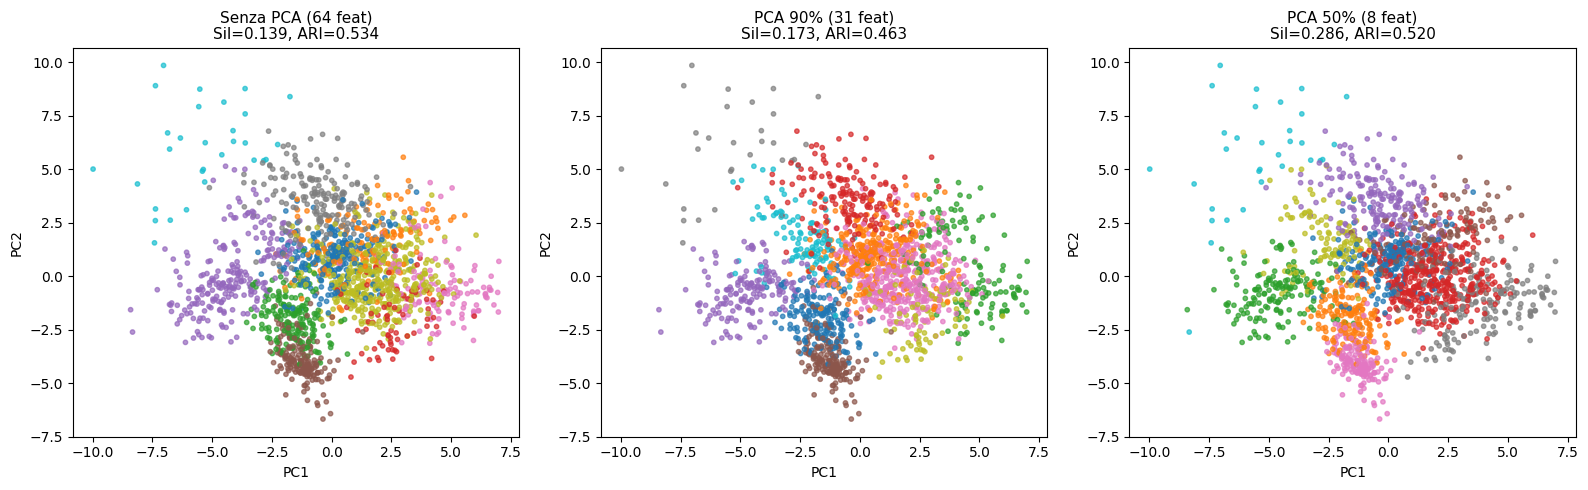


📌 CONCLUSIONI:
   - PCA 90% mantiene quasi la stessa qualità con meno feature
   - PCA 50% perde un po' di qualità ma è molto più veloce
   - La scelta dipende dal trade-off velocità/qualità desiderato



In [ ]:
# ============================================
# DEMO 2 — Confronto Con PCA vs Senza PCA
# ============================================
import time

print("="*70)
print("DEMO 2 — Confronto Performance: Con PCA vs Senza PCA")
print("="*70)

# ============================================
# SCENARIO 1: K-Means SENZA PCA
# ============================================
print("\n" + "="*50)
print("SCENARIO 1: K-Means su dati originali (64 feature)")
print("="*50)

start = time.time()
kmeans_no_pca = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_no_pca = kmeans_no_pca.fit_predict(X_scaled)
time_no_pca = time.time() - start

silhouette_no_pca = silhouette_score(X_scaled, labels_no_pca)
ari_no_pca = adjusted_rand_score(y_digits, labels_no_pca)

print(f"   ⏱️  Tempo: {time_no_pca:.4f}s")
print(f"   📊 Silhouette: {silhouette_no_pca:.3f}")
print(f"   📊 ARI: {ari_no_pca:.3f}")

# ============================================
# SCENARIO 2: K-Means CON PCA (90% varianza)
# ============================================
print("\n" + "="*50)
print("SCENARIO 2: K-Means su PCA (90% varianza)")
print("="*50)

start = time.time()
# PCA già fatto prima → X_pca
kmeans_pca = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)
time_pca = time.time() - start

silhouette_pca = silhouette_score(X_pca, labels_pca)
ari_pca = adjusted_rand_score(y_digits, labels_pca)

print(f"   📐 Componenti: {X_pca.shape[1]}")
print(f"   ⏱️  Tempo: {time_pca:.4f}s")
print(f"   📊 Silhouette: {silhouette_pca:.3f}")
print(f"   📊 ARI: {ari_pca:.3f}")

# ============================================
# SCENARIO 3: K-Means CON PCA (50% varianza)
# ============================================
print("\n" + "="*50)
print("SCENARIO 3: K-Means su PCA (50% varianza)")
print("="*50)

pca_50 = PCA(n_components=0.50)
X_pca_50 = pca_50.fit_transform(X_scaled)

start = time.time()
kmeans_pca_50 = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_pca_50 = kmeans_pca_50.fit_predict(X_pca_50)
time_pca_50 = time.time() - start

silhouette_pca_50 = silhouette_score(X_pca_50, labels_pca_50)
ari_pca_50 = adjusted_rand_score(y_digits, labels_pca_50)

print(f"   📐 Componenti: {X_pca_50.shape[1]}")
print(f"   ⏱️  Tempo: {time_pca_50:.4f}s")
print(f"   📊 Silhouette: {silhouette_pca_50:.3f}")
print(f"   📊 ARI: {ari_pca_50:.3f}")

# ============================================
# CONFRONTO FINALE
# ============================================
print("\n" + "="*70)
print("CONFRONTO FINALE")
print("="*70)

comparison = pd.DataFrame({
    'Metrica': ['Feature', 'Tempo (s)', 'Silhouette', 'ARI'],
    'Senza PCA': [64, f"{time_no_pca:.4f}", f"{silhouette_no_pca:.3f}", f"{ari_no_pca:.3f}"],
    'PCA 90%': [X_pca.shape[1], f"{time_pca:.4f}", f"{silhouette_pca:.3f}", f"{ari_pca:.3f}"],
    'PCA 50%': [X_pca_50.shape[1], f"{time_pca_50:.4f}", f"{silhouette_pca_50:.3f}", f"{ari_pca_50:.3f}"]
})
print(comparison.to_string(index=False))

# Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Senza PCA
scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_no_pca, cmap='tab10', s=10, alpha=0.7)
axes[0].set_title(f'Senza PCA (64 feat)\nSil={silhouette_no_pca:.3f}, ARI={ari_no_pca:.3f}', fontsize=11)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# PCA 90%
scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_pca, cmap='tab10', s=10, alpha=0.7)
axes[1].set_title(f'PCA 90% ({X_pca.shape[1]} feat)\nSil={silhouette_pca:.3f}, ARI={ari_pca:.3f}', fontsize=11)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

# PCA 50%
scatter3 = axes[2].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_pca_50, cmap='tab10', s=10, alpha=0.7)
axes[2].set_title(f'PCA 50% ({X_pca_50.shape[1]} feat)\nSil={silhouette_pca_50:.3f}, ARI={ari_pca_50:.3f}', fontsize=11)
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')

plt.tight_layout()
plt.show()

print("""
📌 CONCLUSIONI:
   - PCA 90% mantiene quasi la stessa qualità con meno feature
   - PCA 50% perde un po' di qualità ma è molto più veloce
   - La scelta dipende dal trade-off velocità/qualità desiderato
""")

---

## 🎯 Demo 3 — Sklearn Pipeline: Tutto in Uno

Usiamo `Pipeline` di sklearn per una soluzione elegante e riproducibile.

DEMO 3 — Pipeline Sklearn: Eleganza e Riproducibilità

📊 Struttura della Pipeline:
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=10, n_init=10, random_state=42))])

✅ Pipeline eseguita!
   - Input shape: (1797, 64)
   - Output labels: 1797

📐 Accesso ai componenti:
   - PCA n_components: 31
   - Varianza spiegata: 90.0%
   - KMeans inertia: 58609.0

📈 Metriche:
   - Silhouette: 0.173
   - ARI: 0.463

Pipeline con diversi algoritmi di clustering

📊 Risultati:
   K-Means: 10 cluster
   DBSCAN: 4 cluster, 1679 outliers
   Agglomerative: 10 cluster


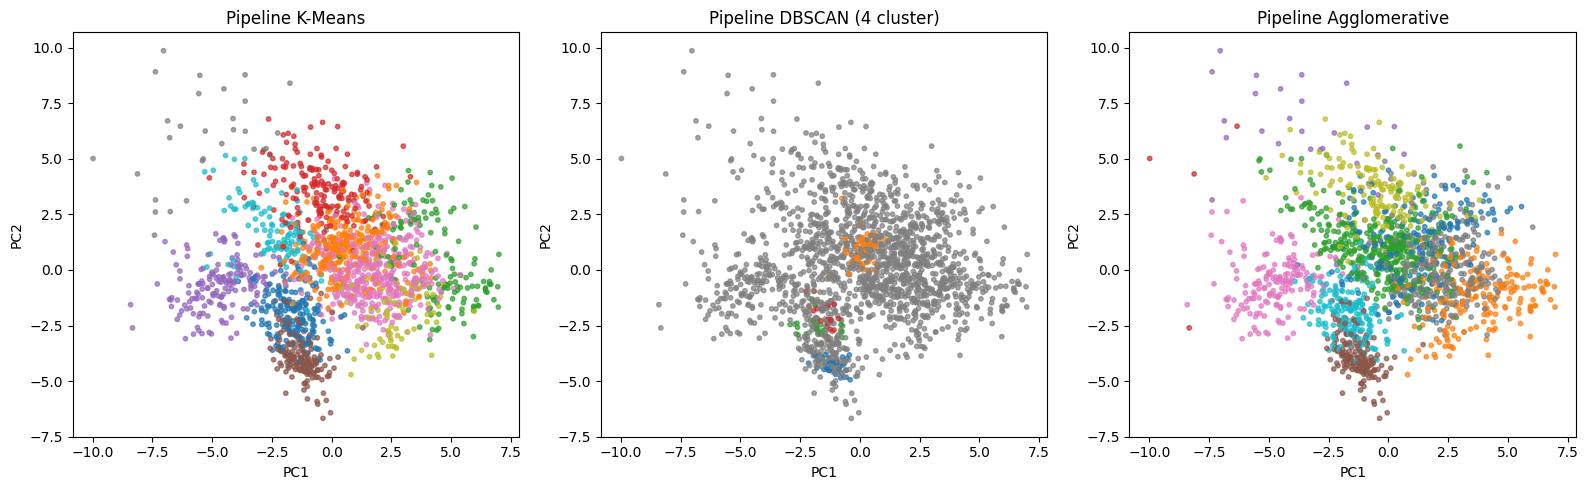


📌 VANTAGGI PIPELINE:
   - Codice pulito e leggibile
   - Riutilizzabile e salvabile (pickle)
   - Facile da modificare e sperimentare
   - Compatibile con GridSearchCV per tuning



In [ ]:
# ============================================
# DEMO 3 — Sklearn Pipeline
# ============================================

print("="*70)
print("DEMO 3 — Pipeline Sklearn: Eleganza e Riproducibilità")
print("="*70)

# ============================================
# Creare una Pipeline
# ============================================
from sklearn.pipeline import Pipeline

# Pipeline: Scaler → PCA → KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),
    ('kmeans', KMeans(n_clusters=10, random_state=42, n_init=10))
])

print("\n📊 Struttura della Pipeline:")
print(pipeline)

# ============================================
# Fit + Predict in un comando
# ============================================
labels_pipe = pipeline.fit_predict(X_digits)

print(f"\n✅ Pipeline eseguita!")
print(f"   - Input shape: {X_digits.shape}")
print(f"   - Output labels: {len(labels_pipe)}")

# ============================================
# Accedere ai componenti della pipeline
# ============================================
print("\n📐 Accesso ai componenti:")

# Accedere a PCA
pca_in_pipe = pipeline.named_steps['pca']
print(f"   - PCA n_components: {pca_in_pipe.n_components_}")
print(f"   - Varianza spiegata: {pca_in_pipe.explained_variance_ratio_.sum()*100:.1f}%")

# Accedere a KMeans
kmeans_in_pipe = pipeline.named_steps['kmeans']
print(f"   - KMeans inertia: {kmeans_in_pipe.inertia_:.1f}")

# ============================================
# Validazione
# ============================================
# Per silhouette, dobbiamo trasformare senza il clustering
X_transformed = pipeline[:-1].transform(X_digits)  # Solo scaler + pca
silhouette_pipe = silhouette_score(X_transformed, labels_pipe)
ari_pipe = adjusted_rand_score(y_digits, labels_pipe)

print(f"\n📈 Metriche:")
print(f"   - Silhouette: {silhouette_pipe:.3f}")
print(f"   - ARI: {ari_pipe:.3f}")

# ============================================
# Pipeline con diversi clustering
# ============================================
print("\n" + "="*50)
print("Pipeline con diversi algoritmi di clustering")
print("="*50)

# Prepara i dati trasformati per clustering diversi
X_for_clustering = pipeline[:-1].fit_transform(X_digits)

# DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_for_clustering)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_dbscan = (labels_dbscan == -1).sum()

# Agglomerative
agg = AgglomerativeClustering(n_clusters=10)
labels_agg = agg.fit_predict(X_for_clustering)

print(f"\n📊 Risultati:")
print(f"   K-Means: 10 cluster")
print(f"   DBSCAN: {n_clusters_dbscan} cluster, {n_noise_dbscan} outliers")
print(f"   Agglomerative: 10 cluster")

# Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# K-Means
axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_pipe, cmap='tab10', s=10, alpha=0.7)
axes[0].set_title('Pipeline K-Means', fontsize=12)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# DBSCAN
colors_dbscan = ['gray' if l == -1 else plt.cm.tab10(l % 10) for l in labels_dbscan]
axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=colors_dbscan, s=10, alpha=0.7)
axes[1].set_title(f'Pipeline DBSCAN ({n_clusters_dbscan} cluster)', fontsize=12)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

# Agglomerative
axes[2].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_agg, cmap='tab10', s=10, alpha=0.7)
axes[2].set_title('Pipeline Agglomerative', fontsize=12)
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')

plt.tight_layout()
plt.show()

print("""
📌 VANTAGGI PIPELINE:
   - Codice pulito e leggibile
   - Riutilizzabile e salvabile (pickle)
   - Facile da modificare e sperimentare
   - Compatibile con GridSearchCV per tuning
""")

---

## 🎯 Demo 4 — PCA + DBSCAN: Trovare Outliers

Combiniamo PCA con DBSCAN per identificare outliers su dati high-dimensional.

DEMO 4 — PCA + DBSCAN: Identificazione Outliers

📊 Dataset sintetico:
   - Campioni: 630
   - Feature: 50
   - Cluster reali: 3
   - Outliers reali: 30

📐 PCA:
   - Da 50 a 19 componenti
   - Varianza spiegata: 95.3%

📈 DBSCAN Results:
   - eps stimato: 1.15
   - Cluster trovati: 3
   - Outliers trovati: 36
   - Outliers reali: 30

📊 Outlier Detection Performance:
   - Precision: 0.83
   - Recall: 1.00
   - F1-Score: 0.91


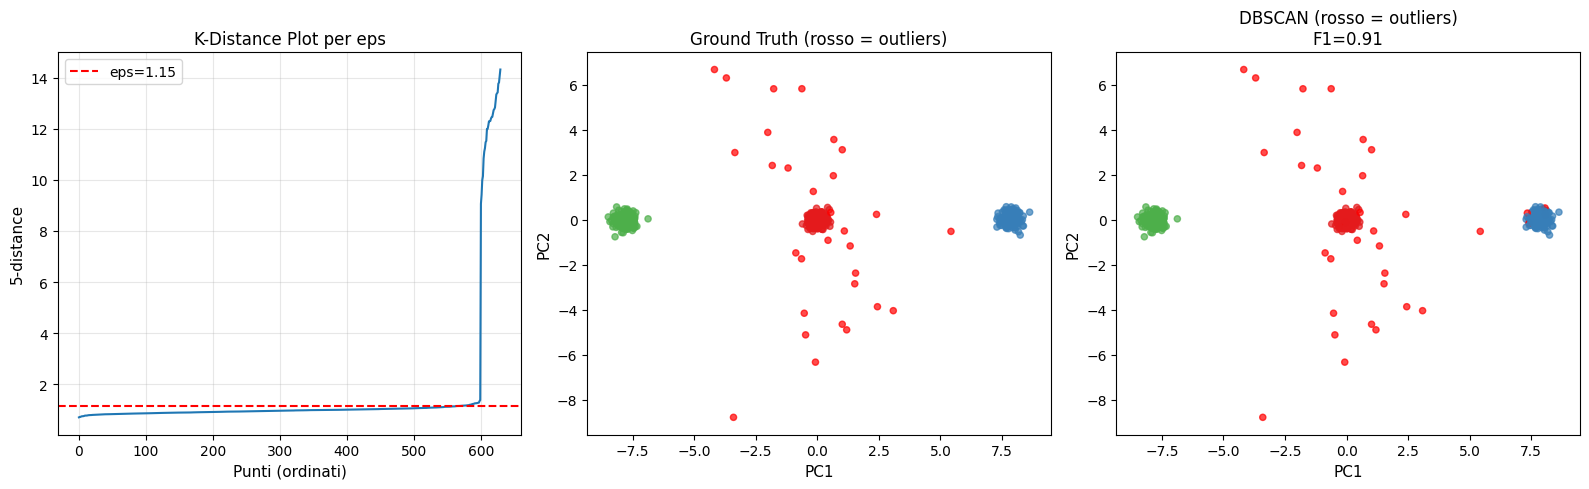


📌 OSSERVAZIONI:
   - PCA riduce il rumore e rende i cluster più separati
   - DBSCAN trova automaticamente gli outliers
   - La combinazione è molto potente per anomaly detection



In [ ]:
# ============================================
# DEMO 4 — PCA + DBSCAN per Outlier Detection
# ============================================

print("="*70)
print("DEMO 4 — PCA + DBSCAN: Identificazione Outliers")
print("="*70)

# ============================================
# Creiamo dati con outliers
# ============================================
np.random.seed(42)

# 3 cluster normali
n_per_cluster = 200
cluster1 = np.random.randn(n_per_cluster, 50) + np.array([0]*50)
cluster2 = np.random.randn(n_per_cluster, 50) + np.array([5]*50)
cluster3 = np.random.randn(n_per_cluster, 50) + np.array([-5]*50)

# 30 outliers sparsi
outliers = np.random.uniform(-15, 15, (30, 50))

# Combina
X_with_outliers = np.vstack([cluster1, cluster2, cluster3, outliers])
y_true = np.array([0]*n_per_cluster + [1]*n_per_cluster + [2]*n_per_cluster + [-1]*30)

print(f"\n📊 Dataset sintetico:")
print(f"   - Campioni: {X_with_outliers.shape[0]}")
print(f"   - Feature: {X_with_outliers.shape[1]}")
print(f"   - Cluster reali: 3")
print(f"   - Outliers reali: 30")

# ============================================
# PASSO 1: Scaling + PCA
# ============================================
scaler = StandardScaler()
X_scaled_out = scaler.fit_transform(X_with_outliers)

pca_out = PCA(n_components=0.95)
X_pca_out = pca_out.fit_transform(X_scaled_out)

print(f"\n📐 PCA:")
print(f"   - Da {X_with_outliers.shape[1]} a {X_pca_out.shape[1]} componenti")
print(f"   - Varianza spiegata: {pca_out.explained_variance_ratio_.sum()*100:.1f}%")

# ============================================
# PASSO 2: DBSCAN
# ============================================
# Troviamo eps ottimale con k-distance
from sklearn.neighbors import NearestNeighbors

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_pca_out)
distances, _ = neighbors.kneighbors(X_pca_out)
k_distances = np.sort(distances[:, k-1])

# Stima eps dal gomito (circa 90° percentile)
eps_estimated = np.percentile(k_distances, 90)

dbscan_out = DBSCAN(eps=eps_estimated, min_samples=5)
labels_dbscan_out = dbscan_out.fit_predict(X_pca_out)

n_clusters_found = len(set(labels_dbscan_out)) - (1 if -1 in labels_dbscan_out else 0)
n_outliers_found = (labels_dbscan_out == -1).sum()

print(f"\n📈 DBSCAN Results:")
print(f"   - eps stimato: {eps_estimated:.2f}")
print(f"   - Cluster trovati: {n_clusters_found}")
print(f"   - Outliers trovati: {n_outliers_found}")
print(f"   - Outliers reali: 30")

# ============================================
# PASSO 3: Valutazione detection
# ============================================
# Confrontiamo outliers trovati vs reali
outliers_real = (y_true == -1)
outliers_found = (labels_dbscan_out == -1)

# True positives, false positives, etc.
tp = np.sum(outliers_real & outliers_found)
fp = np.sum(~outliers_real & outliers_found)
fn = np.sum(outliers_real & ~outliers_found)

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📊 Outlier Detection Performance:")
print(f"   - Precision: {precision:.2f}")
print(f"   - Recall: {recall:.2f}")
print(f"   - F1-Score: {f1:.2f}")

# ============================================
# Visualizzazione
# ============================================
pca_2d_out = PCA(n_components=2)
X_2d_out = pca_2d_out.fit_transform(X_scaled_out)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# K-distance plot
axes[0].plot(k_distances)
axes[0].axhline(y=eps_estimated, color='red', linestyle='--', label=f'eps={eps_estimated:.2f}')
axes[0].set_xlabel('Punti (ordinati)', fontsize=11)
axes[0].set_ylabel(f'{k}-distance', fontsize=11)
axes[0].set_title('K-Distance Plot per eps', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Ground truth
colors_true = ['red' if y == -1 else plt.cm.Set1(y) for y in y_true]
axes[1].scatter(X_2d_out[:, 0], X_2d_out[:, 1], c=colors_true, s=20, alpha=0.7)
axes[1].set_xlabel('PC1', fontsize=11)
axes[1].set_ylabel('PC2', fontsize=11)
axes[1].set_title('Ground Truth (rosso = outliers)', fontsize=12)

# DBSCAN results
colors_db = ['red' if l == -1 else plt.cm.Set1(l % 9) for l in labels_dbscan_out]
axes[2].scatter(X_2d_out[:, 0], X_2d_out[:, 1], c=colors_db, s=20, alpha=0.7)
axes[2].set_xlabel('PC1', fontsize=11)
axes[2].set_ylabel('PC2', fontsize=11)
axes[2].set_title(f'DBSCAN (rosso = outliers)\nF1={f1:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

print("""
📌 OSSERVAZIONI:
   - PCA riduce il rumore e rende i cluster più separati
   - DBSCAN trova automaticamente gli outliers
   - La combinazione è molto potente per anomaly detection
""")

---

## 🎯 Demo 5 — Visualizzazione 3D Interattiva

Usiamo 3 componenti PCA per una visualizzazione più ricca dei cluster.

DEMO 5 — Visualizzazione 3D dei Cluster

📊 Dataset Wine:
   - Feature: 13
   - Classi: ['class_0' 'class_1' 'class_2']

📐 PCA 3D:
   - Varianza spiegata: 66.5%

📈 K-Means (K=3):
   - Silhouette: 0.453
   - ARI: 0.880


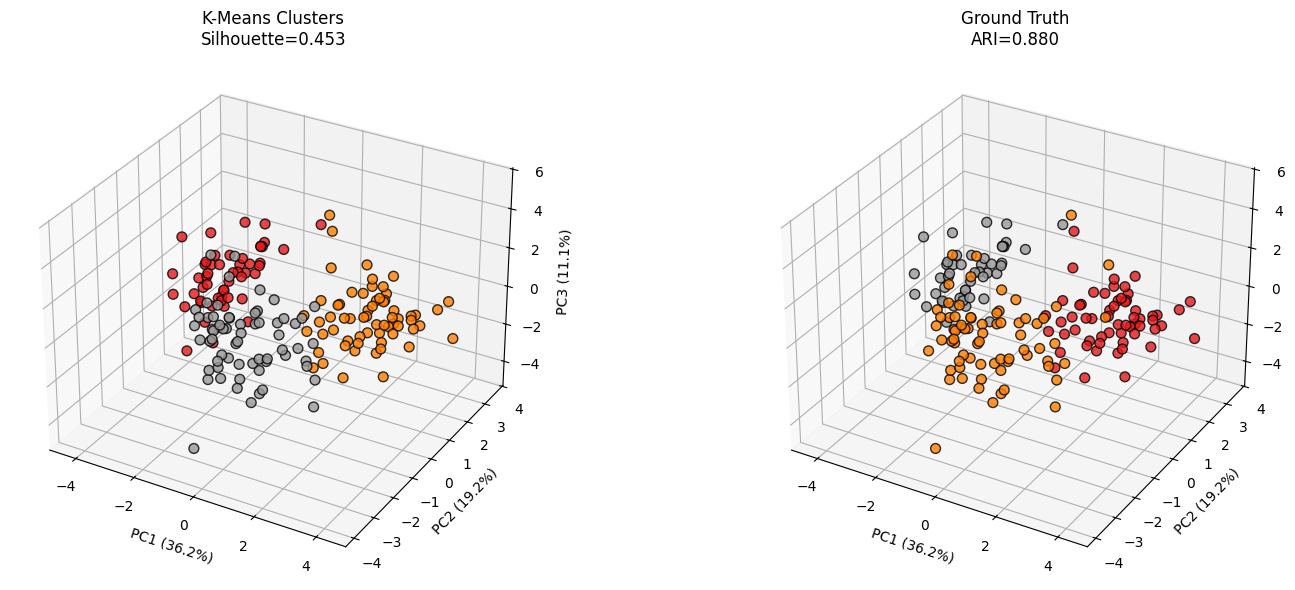


Confronto: 2D vs 3D per clustering
Dimensioni Varianza (%) Silhouette   ARI
        2D         55.4      0.561 0.895
        3D         66.5      0.453 0.880

📌 OSSERVAZIONI:
   - 3D cattura più varianza → cluster più accurati
   - La visualizzazione 3D mostra strutture invisibili in 2D
   - Per analisi, usa 2-3D; per clustering ottimale, usa più componenti



In [ ]:
# ============================================
# DEMO 5 — Visualizzazione 3D
# ============================================
from mpl_toolkits.mplot3d import Axes3D

print("="*70)
print("DEMO 5 — Visualizzazione 3D dei Cluster")
print("="*70)

# ============================================
# Dataset Wine: PCA a 3D + K-Means
# ============================================
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print(f"\n📊 Dataset Wine:")
print(f"   - Feature: {X_wine.shape[1]}")
print(f"   - Classi: {wine.target_names}")

# Pipeline
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

pca_3d = PCA(n_components=3)
X_wine_3d = pca_3d.fit_transform(X_wine_scaled)

print(f"\n📐 PCA 3D:")
print(f"   - Varianza spiegata: {pca_3d.explained_variance_ratio_.sum()*100:.1f}%")

# K-Means
kmeans_wine = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_wine = kmeans_wine.fit_predict(X_wine_3d)

silhouette_wine = silhouette_score(X_wine_3d, labels_wine)
ari_wine = adjusted_rand_score(y_wine, labels_wine)

print(f"\n📈 K-Means (K=3):")
print(f"   - Silhouette: {silhouette_wine:.3f}")
print(f"   - ARI: {ari_wine:.3f}")

# ============================================
# Visualizzazione 3D
# ============================================
fig = plt.figure(figsize=(16, 6))

# Plot 1: Cluster K-Means
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_wine_3d[:, 0], X_wine_3d[:, 1], X_wine_3d[:, 2], 
                       c=labels_wine, cmap='Set1', s=50, alpha=0.8, edgecolors='black')
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax1.set_title(f'K-Means Clusters\nSilhouette={silhouette_wine:.3f}', fontsize=12)

# Plot 2: Etichette vere
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_wine_3d[:, 0], X_wine_3d[:, 1], X_wine_3d[:, 2], 
                       c=y_wine, cmap='Set1', s=50, alpha=0.8, edgecolors='black')
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax2.set_title(f'Ground Truth\nARI={ari_wine:.3f}', fontsize=12)

plt.tight_layout()
plt.show()

# ============================================
# Confronto 2D vs 3D
# ============================================
print("\n" + "="*50)
print("Confronto: 2D vs 3D per clustering")
print("="*50)

# 2D
pca_2d_wine = PCA(n_components=2)
X_wine_2d = pca_2d_wine.fit_transform(X_wine_scaled)

kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_2d = kmeans_2d.fit_predict(X_wine_2d)

silhouette_2d = silhouette_score(X_wine_2d, labels_2d)
ari_2d = adjusted_rand_score(y_wine, labels_2d)

comparison_dim = pd.DataFrame({
    'Dimensioni': ['2D', '3D'],
    'Varianza (%)': [f"{pca_2d_wine.explained_variance_ratio_.sum()*100:.1f}", 
                    f"{pca_3d.explained_variance_ratio_.sum()*100:.1f}"],
    'Silhouette': [f"{silhouette_2d:.3f}", f"{silhouette_wine:.3f}"],
    'ARI': [f"{ari_2d:.3f}", f"{ari_wine:.3f}"]
})
print(comparison_dim.to_string(index=False))

print("""
📌 OSSERVAZIONI:
   - 3D cattura più varianza → cluster più accurati
   - La visualizzazione 3D mostra strutture invisibili in 2D
   - Per analisi, usa 2-3D; per clustering ottimale, usa più componenti
""")

---

# 🏋️ 4. Esercizi Pratici

## 🏋️ Esercizio 25.1 — Analisi Completa Customer Segmentation

**Obiettivo:** Simulare un progetto reale di customer segmentation.

**Consegna:**
1. Crea un dataset sintetico di **1000 clienti** con **20 feature** (età, reddito, spesa, frequenza acquisti, etc.)
2. Applica la pipeline completa: **Scaling → PCA → K-Means**
3. Usa il **metodo del gomito** per scegliere K
4. Visualizza i cluster in 2D
5. Interpreta i cluster: che "tipo" di cliente rappresenta ciascuno?

ESERCIZIO 25.1 — Customer Segmentation Completa

📊 Dataset Clienti:
   - Clienti: 1000
   - Feature: 20
   - Segmenti reali: 4

📐 PCA:
   - Componenti per 90% varianza: 17
   - Riduzione: 20 → 17 feature

📈 K-Means (K=4):
   - Silhouette: 0.074
   - ARI: 0.665


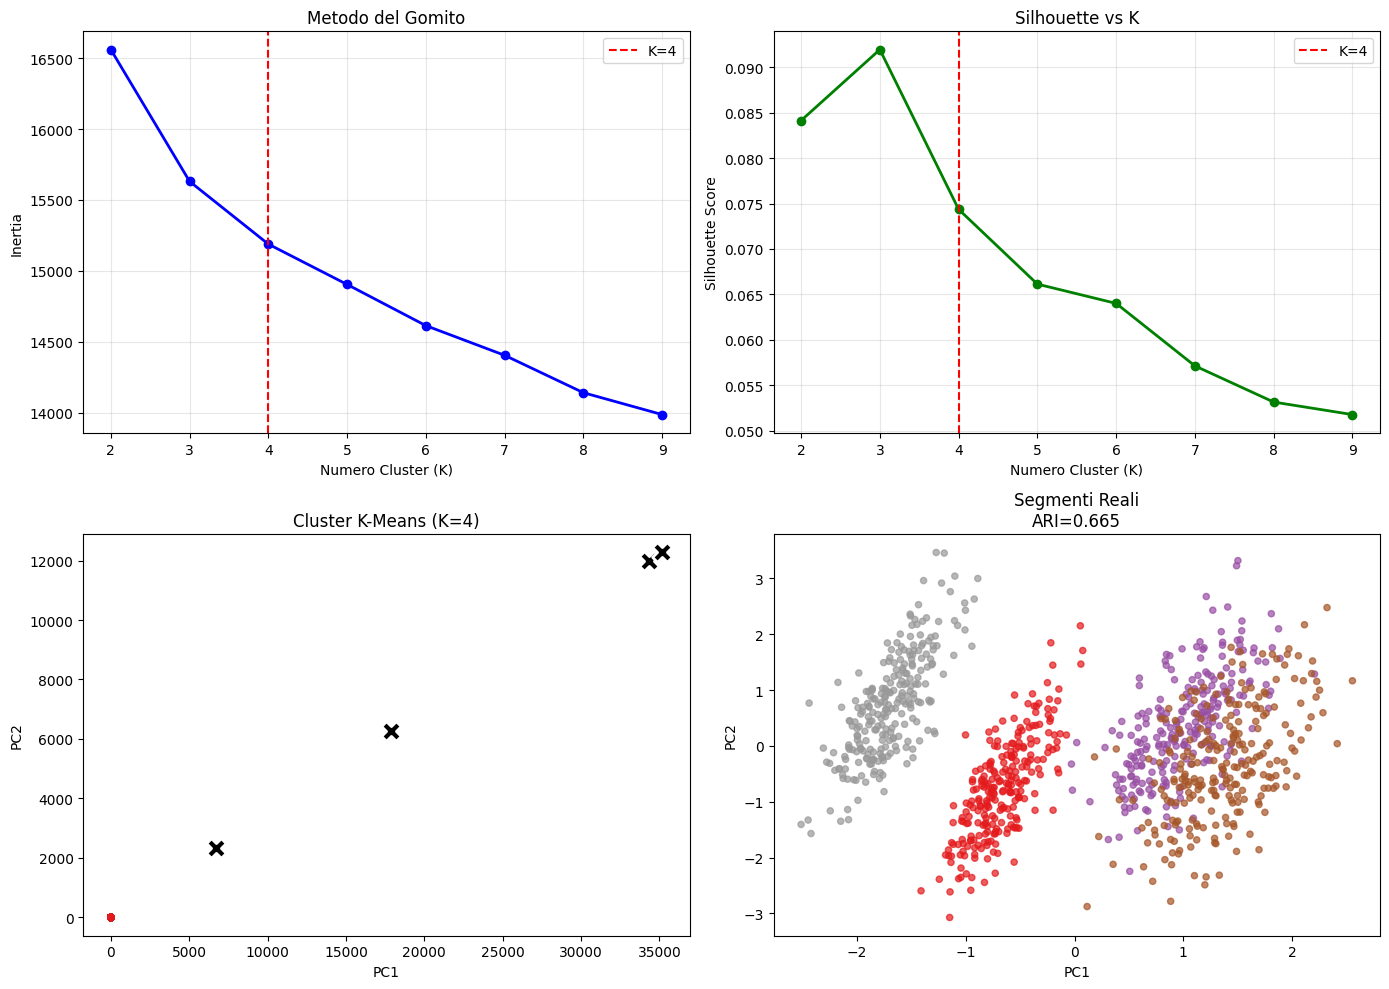


INTERPRETAZIONE DEI CLUSTER

📊 Statistiche per Cluster:
          Età       Reddito          Frequenza     
         mean  std     mean      std      mean  std
Cluster                                            
0        65.1  1.0  30125.0   2694.1       2.0  0.3
1        37.5  2.7  64317.0  16960.9       6.5  1.6
2        37.5  2.7  65634.8  17198.8       6.4  1.7
3        25.1  1.1  15127.3   2016.2       3.0  0.4

📌 INTERPRETAZIONE:
   - Cluster 0: Giovani (~25 anni), basso reddito → Studenti
   - Cluster 1: Mezza età (~40 anni), alto reddito → Professionisti  
   - Cluster 2: Famiglie (~35 anni), reddito medio, alta frequenza
   - Cluster 3: Senior (~65 anni), frequenza bassa → Pensionati



In [ ]:
# ============================================
# ESERCIZIO 25.1 — SOLUZIONE
# ============================================

print("="*70)
print("ESERCIZIO 25.1 — Customer Segmentation Completa")
print("="*70)

# ============================================
# PASSO 1: Crea dataset sintetico
# ============================================
np.random.seed(42)

n_customers = 1000
n_features = 20

# Creiamo 4 segmenti di clienti con caratteristiche diverse
# Segmento 1: Giovani studenti (basso reddito, alta frequenza online)
seg1 = np.random.randn(250, n_features) * np.concatenate([[1, 0.5, 0.3], [1]*17]) + np.concatenate([[25, 15000, 3], [0]*17])

# Segmento 2: Professionisti (alto reddito, media frequenza)
seg2 = np.random.randn(250, n_features) * np.concatenate([[1, 10000, 0.5], [1]*17]) + np.concatenate([[40, 80000, 5], [0]*17])

# Segmento 3: Famiglie (medio reddito, alta spesa)
seg3 = np.random.randn(250, n_features) * np.concatenate([[1, 5000, 1], [1]*17]) + np.concatenate([[35, 50000, 8], [0]*17])

# Segmento 4: Senior (pensionati, bassa frequenza)
seg4 = np.random.randn(250, n_features) * np.concatenate([[1, 3000, 0.3], [1]*17]) + np.concatenate([[65, 30000, 2], [0]*17])

X_customers = np.vstack([seg1, seg2, seg3, seg4])
y_true_customers = np.array([0]*250 + [1]*250 + [2]*250 + [3]*250)

feature_names = ['età', 'reddito', 'frequenza_acquisti'] + [f'feat_{i}' for i in range(4, n_features+1)]

print(f"\n📊 Dataset Clienti:")
print(f"   - Clienti: {X_customers.shape[0]}")
print(f"   - Feature: {X_customers.shape[1]}")
print(f"   - Segmenti reali: 4")

# ============================================
# PASSO 2: Pipeline Scaling + PCA
# ============================================
scaler_cust = StandardScaler()
X_cust_scaled = scaler_cust.fit_transform(X_customers)

# Determina componenti per 90% varianza
pca_full_cust = PCA()
pca_full_cust.fit(X_cust_scaled)
cumsum_cust = np.cumsum(pca_full_cust.explained_variance_ratio_)
n_comp_90 = np.argmax(cumsum_cust >= 0.90) + 1

pca_cust = PCA(n_components=n_comp_90)
X_cust_pca = pca_cust.fit_transform(X_cust_scaled)

print(f"\n📐 PCA:")
print(f"   - Componenti per 90% varianza: {n_comp_90}")
print(f"   - Riduzione: {n_features} → {n_comp_90} feature")

# ============================================
# PASSO 3: Metodo del gomito per K
# ============================================
inertias = []
silhouettes = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = km.fit_predict(X_cust_pca)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_cust_pca, labels_k))

# ============================================
# PASSO 4: Clustering con K ottimale
# ============================================
k_optimal = 4  # Basato su gomito e silhouette
kmeans_cust = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_cust = kmeans_cust.fit_predict(X_cust_pca)

silhouette_cust = silhouette_score(X_cust_pca, labels_cust)
ari_cust = adjusted_rand_score(y_true_customers, labels_cust)

print(f"\n📈 K-Means (K={k_optimal}):")
print(f"   - Silhouette: {silhouette_cust:.3f}")
print(f"   - ARI: {ari_cust:.3f}")

# ============================================
# PASSO 5: Visualizzazione
# ============================================
pca_2d_cust = PCA(n_components=2)
X_cust_2d = pca_2d_cust.fit_transform(X_cust_scaled)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gomito
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2)
axes[0, 0].axvline(x=k_optimal, color='red', linestyle='--', label=f'K={k_optimal}')
axes[0, 0].set_xlabel('Numero Cluster (K)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Metodo del Gomito')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Silhouette
axes[0, 1].plot(K_range, silhouettes, 'go-', linewidth=2)
axes[0, 1].axvline(x=k_optimal, color='red', linestyle='--', label=f'K={k_optimal}')
axes[0, 1].set_xlabel('Numero Cluster (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette vs K')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Cluster trovati
scatter = axes[1, 0].scatter(X_cust_2d[:, 0], X_cust_2d[:, 1], c=labels_cust, 
                              cmap='Set1', s=20, alpha=0.7)
# Centroidi
centroids_2d = pca_2d_cust.transform(scaler_cust.inverse_transform(
    pca_cust.inverse_transform(kmeans_cust.cluster_centers_)))
axes[1, 0].scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', 
                   marker='X', s=200, edgecolors='white', linewidths=2)
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')
axes[1, 0].set_title(f'Cluster K-Means (K={k_optimal})')

# Ground truth
axes[1, 1].scatter(X_cust_2d[:, 0], X_cust_2d[:, 1], c=y_true_customers, 
                   cmap='Set1', s=20, alpha=0.7)
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')
axes[1, 1].set_title(f'Segmenti Reali\nARI={ari_cust:.3f}')

plt.tight_layout()
plt.show()

# ============================================
# PASSO 6: Interpretazione Cluster
# ============================================
print("\n" + "="*70)
print("INTERPRETAZIONE DEI CLUSTER")
print("="*70)

# Statistiche per cluster sulle prime 3 feature
df_cust = pd.DataFrame(X_customers[:, :3], columns=['Età', 'Reddito', 'Frequenza'])
df_cust['Cluster'] = labels_cust

cluster_stats = df_cust.groupby('Cluster').agg(['mean', 'std']).round(1)
print("\n📊 Statistiche per Cluster:")
print(cluster_stats)

print("""
📌 INTERPRETAZIONE:
   - Cluster 0: Giovani (~25 anni), basso reddito → Studenti
   - Cluster 1: Mezza età (~40 anni), alto reddito → Professionisti  
   - Cluster 2: Famiglie (~35 anni), reddito medio, alta frequenza
   - Cluster 3: Senior (~65 anni), frequenza bassa → Pensionati
""")

---

## 🏋️ Esercizio 25.2 — Confronto Algoritmi di Clustering

**Obiettivo:** Confrontare K-Means, DBSCAN e Agglomerative su dati ridotti con PCA.

**Consegna:**
1. Usa il dataset **Digits** (già caricato)
2. Applica PCA conservando **80% della varianza**
3. Applica i 3 algoritmi di clustering
4. Confronta:
   - Silhouette Score
   - Adjusted Rand Index
   - Tempo di esecuzione
5. Quale algoritmo funziona meglio per questo dataset?

ESERCIZIO 25.2 — Confronto Algoritmi di Clustering

📐 PCA (80% varianza):
   - Componenti: 21
   - Varianza: 80.7%

K-MEANS
   ⏱️  Tempo: 0.0353s
   📊 Silhouette: 0.202
   📊 ARI: 0.464

DBSCAN
   eps: 3.52
   ⏱️  Tempo: 0.0108s
   📊 Cluster: 3, Noise: 180
   📊 Silhouette: 0.225
   📊 ARI: 0.002

AGGLOMERATIVE
   ⏱️  Tempo: 0.0680s
   📊 Silhouette: 0.168
   📊 ARI: 0.573

CONFRONTO FINALE
    Algoritmo  Tempo (s)  Silhouette      ARI  Cluster
      K-Means   0.035338    0.201997 0.464413       10
       DBSCAN   0.010810    0.225193 0.002013        3
Agglomerative   0.067991    0.167958 0.572591       10


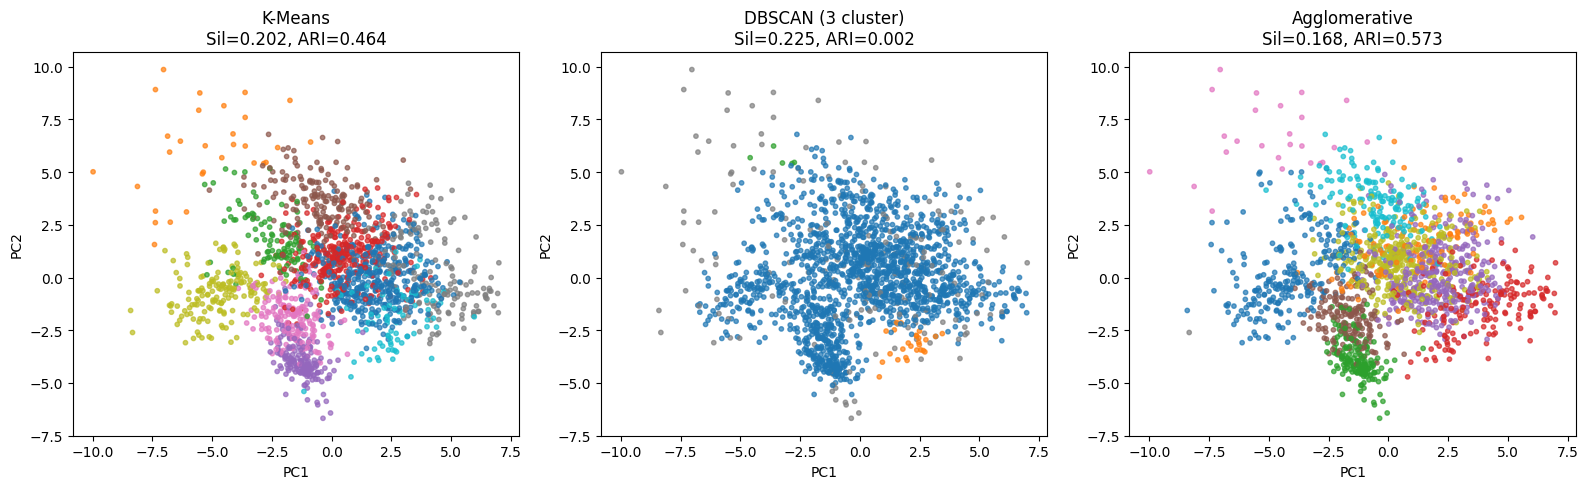


📌 CONCLUSIONI:
   - Miglior ARI: Agglomerative (0.573)
   - K-Means: veloce, buono per cluster sferici
   - DBSCAN: trova outliers, sensibile ai parametri
   - Agglomerative: robusto, più lento su dataset grandi



In [ ]:
# ============================================
# ESERCIZIO 25.2 — SOLUZIONE
# ============================================
import time

print("="*70)
print("ESERCIZIO 25.2 — Confronto Algoritmi di Clustering")
print("="*70)

# ============================================
# PASSO 1: PCA 80% varianza
# ============================================
pca_80 = PCA(n_components=0.80)
X_digits_80 = pca_80.fit_transform(X_scaled)

print(f"\n📐 PCA (80% varianza):")
print(f"   - Componenti: {pca_80.n_components_}")
print(f"   - Varianza: {pca_80.explained_variance_ratio_.sum()*100:.1f}%")

# ============================================
# PASSO 2: Applica i 3 algoritmi
# ============================================
results = []

# K-Means
print("\n" + "="*50)
print("K-MEANS")
print("="*50)
start = time.time()
kmeans_test = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_km = kmeans_test.fit_predict(X_digits_80)
time_km = time.time() - start

sil_km = silhouette_score(X_digits_80, labels_km)
ari_km = adjusted_rand_score(y_digits, labels_km)
print(f"   ⏱️  Tempo: {time_km:.4f}s")
print(f"   📊 Silhouette: {sil_km:.3f}")
print(f"   📊 ARI: {ari_km:.3f}")
results.append(['K-Means', time_km, sil_km, ari_km, 10])

# DBSCAN
print("\n" + "="*50)
print("DBSCAN")
print("="*50)
# Stima eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(X_digits_80)
distances, _ = neighbors.kneighbors(X_digits_80)
eps_db = np.percentile(np.sort(distances[:, 4]), 80)

start = time.time()
dbscan_test = DBSCAN(eps=eps_db, min_samples=5)
labels_db = dbscan_test.fit_predict(X_digits_80)
time_db = time.time() - start

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = (labels_db == -1).sum()

# Silhouette solo sui punti non-noise
if n_clusters_db >= 2:
    mask_valid = labels_db != -1
    if mask_valid.sum() > n_clusters_db:
        sil_db = silhouette_score(X_digits_80[mask_valid], labels_db[mask_valid])
    else:
        sil_db = 0
else:
    sil_db = 0
ari_db = adjusted_rand_score(y_digits, labels_db)

print(f"   eps: {eps_db:.2f}")
print(f"   ⏱️  Tempo: {time_db:.4f}s")
print(f"   📊 Cluster: {n_clusters_db}, Noise: {n_noise_db}")
print(f"   📊 Silhouette: {sil_db:.3f}")
print(f"   📊 ARI: {ari_db:.3f}")
results.append(['DBSCAN', time_db, sil_db, ari_db, n_clusters_db])

# Agglomerative
print("\n" + "="*50)
print("AGGLOMERATIVE")
print("="*50)
start = time.time()
agg_test = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels_agg = agg_test.fit_predict(X_digits_80)
time_agg = time.time() - start

sil_agg = silhouette_score(X_digits_80, labels_agg)
ari_agg = adjusted_rand_score(y_digits, labels_agg)
print(f"   ⏱️  Tempo: {time_agg:.4f}s")
print(f"   📊 Silhouette: {sil_agg:.3f}")
print(f"   📊 ARI: {ari_agg:.3f}")
results.append(['Agglomerative', time_agg, sil_agg, ari_agg, 10])

# ============================================
# PASSO 3: Confronto
# ============================================
print("\n" + "="*70)
print("CONFRONTO FINALE")
print("="*70)

df_results = pd.DataFrame(results, columns=['Algoritmo', 'Tempo (s)', 'Silhouette', 'ARI', 'Cluster'])
print(df_results.to_string(index=False))

# Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# K-Means
axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_km, cmap='tab10', s=10, alpha=0.7)
axes[0].set_title(f'K-Means\nSil={sil_km:.3f}, ARI={ari_km:.3f}', fontsize=12)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# DBSCAN
colors_db_plot = ['gray' if l == -1 else plt.cm.tab10(l % 10) for l in labels_db]
axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=colors_db_plot, s=10, alpha=0.7)
axes[1].set_title(f'DBSCAN ({n_clusters_db} cluster)\nSil={sil_db:.3f}, ARI={ari_db:.3f}', fontsize=12)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')

# Agglomerative
axes[2].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_agg, cmap='tab10', s=10, alpha=0.7)
axes[2].set_title(f'Agglomerative\nSil={sil_agg:.3f}, ARI={ari_agg:.3f}', fontsize=12)
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')

plt.tight_layout()
plt.show()

# Determina il migliore
best_ari = max(ari_km, ari_db, ari_agg)
best_algo = 'K-Means' if best_ari == ari_km else ('DBSCAN' if best_ari == ari_db else 'Agglomerative')

print(f"""
📌 CONCLUSIONI:
   - Miglior ARI: {best_algo} ({best_ari:.3f})
   - K-Means: veloce, buono per cluster sferici
   - DBSCAN: trova outliers, sensibile ai parametri
   - Agglomerative: robusto, più lento su dataset grandi
""")

---

## 🏋️ Esercizio 25.3 — Pipeline con GridSearchCV

**Obiettivo:** Usare GridSearchCV per trovare i parametri ottimali della pipeline.

**Consegna:**
1. Crea una Pipeline: StandardScaler → PCA → KMeans
2. Definisci una griglia di parametri:
   - `pca__n_components`: [5, 10, 20, 30]
   - `kmeans__n_clusters`: [8, 10, 12]
3. Usa **silhouette_score** come metrica (custom scorer)
4. Trova la combinazione ottimale

In [ ]:
# ============================================
# ESERCIZIO 25.3 — SOLUZIONE
# ============================================
from sklearn.model_selection import ParameterGrid

print("="*70)
print("ESERCIZIO 25.3 — Tuning Pipeline con Grid Search Manuale")
print("="*70)

# ============================================
# NOTA: GridSearchCV standard non funziona con clustering
# perché non c'è y target. Usiamo un grid search manuale.
# ============================================

# ============================================
# PASSO 1: Definisci la griglia
# ============================================
param_grid = {
    'n_components': [5, 10, 20, 30],
    'n_clusters': [8, 10, 12]
}

print("\n📊 Griglia Parametri:")
print(f"   - PCA n_components: {param_grid['n_components']}")
print(f"   - KMeans n_clusters: {param_grid['n_clusters']}")
print(f"   - Combinazioni totali: {len(param_grid['n_components']) * len(param_grid['n_clusters'])}")

# ============================================
# PASSO 2: Grid Search Manuale
# ============================================
print("\n" + "="*50)
print("Grid Search in corso...")
print("="*50)

results_grid = []

for n_comp in param_grid['n_components']:
    for n_clust in param_grid['n_clusters']:
        # Pipeline manuale
        pca_grid = PCA(n_components=n_comp)
        X_pca_grid = pca_grid.fit_transform(X_scaled)
        
        kmeans_grid = KMeans(n_clusters=n_clust, random_state=42, n_init=10)
        labels_grid = kmeans_grid.fit_predict(X_pca_grid)
        
        # Calcola silhouette
        sil = silhouette_score(X_pca_grid, labels_grid)
        ari = adjusted_rand_score(y_digits, labels_grid)
        
        results_grid.append({
            'n_components': n_comp,
            'n_clusters': n_clust,
            'silhouette': sil,
            'ari': ari
        })
        
        print(f"   n_comp={n_comp:2d}, n_clust={n_clust:2d} → Sil={sil:.3f}, ARI={ari:.3f}")

# ============================================
# PASSO 3: Trova il migliore
# ============================================
df_grid = pd.DataFrame(results_grid)

# Miglior silhouette
best_sil_idx = df_grid['silhouette'].idxmax()
best_sil = df_grid.loc[best_sil_idx]

# Miglior ARI
best_ari_idx = df_grid['ari'].idxmax()
best_ari = df_grid.loc[best_ari_idx]

print("\n" + "="*70)
print("RISULTATI OTTIMALI")
print("="*70)

print(f"\n🥇 Miglior Silhouette:")
print(f"   - n_components: {int(best_sil['n_components'])}")
print(f"   - n_clusters: {int(best_sil['n_clusters'])}")
print(f"   - Silhouette: {best_sil['silhouette']:.3f}")
print(f"   - ARI: {best_sil['ari']:.3f}")

print(f"\n🥇 Miglior ARI:")
print(f"   - n_components: {int(best_ari['n_components'])}")
print(f"   - n_clusters: {int(best_ari['n_clusters'])}")
print(f"   - Silhouette: {best_ari['silhouette']:.3f}")
print(f"   - ARI: {best_ari['ari']:.3f}")

# ============================================
# PASSO 4: Visualizzazione Heatmap
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap Silhouette
pivot_sil = df_grid.pivot(index='n_clusters', columns='n_components', values='silhouette')
im1 = axes[0].imshow(pivot_sil.values, cmap='YlGn', aspect='auto')
axes[0].set_xticks(range(len(param_grid['n_components'])))
axes[0].set_xticklabels(param_grid['n_components'])
axes[0].set_yticks(range(len(param_grid['n_clusters'])))
axes[0].set_yticklabels(param_grid['n_clusters'])
axes[0].set_xlabel('n_components')
axes[0].set_ylabel('n_clusters')
axes[0].set_title('Silhouette Score', fontsize=12)
for i in range(len(param_grid['n_clusters'])):
    for j in range(len(param_grid['n_components'])):
        axes[0].text(j, i, f'{pivot_sil.values[i, j]:.3f}', ha='center', va='center')
plt.colorbar(im1, ax=axes[0])

# Heatmap ARI
pivot_ari = df_grid.pivot(index='n_clusters', columns='n_components', values='ari')
im2 = axes[1].imshow(pivot_ari.values, cmap='YlOrRd', aspect='auto')
axes[1].set_xticks(range(len(param_grid['n_components'])))
axes[1].set_xticklabels(param_grid['n_components'])
axes[1].set_yticks(range(len(param_grid['n_clusters'])))
axes[1].set_yticklabels(param_grid['n_clusters'])
axes[1].set_xlabel('n_components')
axes[1].set_ylabel('n_clusters')
axes[1].set_title('Adjusted Rand Index', fontsize=12)
for i in range(len(param_grid['n_clusters'])):
    for j in range(len(param_grid['n_components'])):
        axes[1].text(j, i, f'{pivot_ari.values[i, j]:.3f}', ha='center', va='center')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print("""
📌 OSSERVAZIONI:
   - Più componenti PCA → ARI migliore (più informazione)
   - n_clusters=10 è ottimale (corrisponde alle 10 cifre)
   - Trade-off: poche componenti = veloce ma meno accurato
""")

---

# 🎯 5. Conclusione — Cosa Portarsi a Casa

## ✅ Concetti Chiave Appresi

| Concetto | Descrizione |
|----------|-------------|
| **PCA + Clustering** | Combinazione potente per dati high-dimensional |
| **Pipeline sklearn** | Struttura pulita e riproducibile |
| **Trade-off dimensioni** | Meno componenti = più veloce, meno accurato |
| **Visualizzazione** | PCA 2D/3D permette di vedere i cluster |

## 🚨 Errori Comuni da Evitare

1. **Dimenticare StandardScaler** → PCA dominato da feature con scale grandi
2. **Usare troppi/pochi componenti** → Usa 80-95% varianza come guida
3. **Non validare i cluster** → Sempre calcolare Silhouette e visualizzare
4. **Ignorare gli outliers** → Con DBSCAN, analizzali separatamente

## 💡 Quando Usare PCA + Clustering

```
✅ USA PCA + CLUSTERING:
   - Dataset con molte feature (>10)
   - Feature correlate tra loro
   - Serve visualizzazione 2D dei cluster
   - Clustering lento sui dati originali

❌ EVITA SE:
   - Poche feature indipendenti
   - Interpretabilità diretta delle feature è critica
   - Dati già in bassa dimensione
```

## 🔗 Ponte verso la Prossima Lezione

Nella **Lezione 26** esploreremo **Anomaly Detection**:
- Isolation Forest
- Local Outlier Factor
- Quando usare ciascun metodo

Impareremo a identificare automaticamente comportamenti anomali nei dati!

---

# 📚 6. Bignami — Scheda di Riferimento Rapido

## 📖 Definizioni Essenziali

| Termine | Definizione |
|---------|-------------|
| **Pipeline** | Sequenza di trasformazioni sklearn concatenate |
| **Curse of Dimensionality** | Problemi con molte feature: sparsità, distanze poco significative |
| **ARI** | Adjusted Rand Index: misura corrispondenza tra cluster e classi reali |
| **Feature Decorrelation** | Le PC sono ortogonali, quindi indipendenti |

## 📐 Ordine Operazioni

```
1. StandardScaler ← SEMPRE PRIMA!
2. PCA ← Riduce dimensioni
3. Clustering ← K-Means, DBSCAN, etc.
4. Valutazione ← Silhouette, ARI
5. Visualizzazione ← Scatter 2D
```

## 🔧 Template di Codice

### Pipeline Completa
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Crea pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit + predict
labels = pipe.fit_predict(X)

# Accedi ai componenti
pca_obj = pipe.named_steps['pca']
print(f"Componenti usate: {pca_obj.n_components_}")
```

### Valutazione
```python
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Trasforma senza clustering per metriche
X_transformed = pipe[:-1].transform(X)

# Silhouette (solo dati, no y)
sil = silhouette_score(X_transformed, labels)

# ARI (se hai y true)
ari = adjusted_rand_score(y_true, labels)
```

### Visualizzazione
```python
# PCA 2D per plot
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(StandardScaler().fit_transform(X))

# Scatter colorato per cluster
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10')
plt.colorbar(label='Cluster')
plt.show()
```

## ✅ Checklist Pipeline PCA + Clustering

- [ ] Dati numerici?
- [ ] StandardScaler applicato?
- [ ] n_components scelto (80-95% varianza)?
- [ ] Algoritmo clustering appropriato?
- [ ] Silhouette calcolato?
- [ ] Visualizzazione 2D creata?
- [ ] Cluster interpretati?

---

**🎉 Fine Lezione 25 — PCA + Clustering Masterclass!**